In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
rwrds = torch.load("./saved_rwrds.pt")
rates = torch.load("./saved_rates_overwrite.pt")

In [3]:
rwrds.shape

torch.Size([20, 9, 100])

In [4]:
mean_rwrd = rwrds.mean(0)

In [5]:
record_length = torch.arange(1, rwrds.shape[1]+1)
iterations = torch.arange(rwrds.shape[-1])

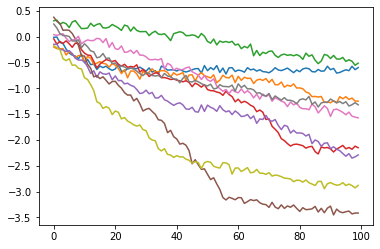

In [6]:
plt.plot(iterations, mean_rwrd.t())
plt.show()

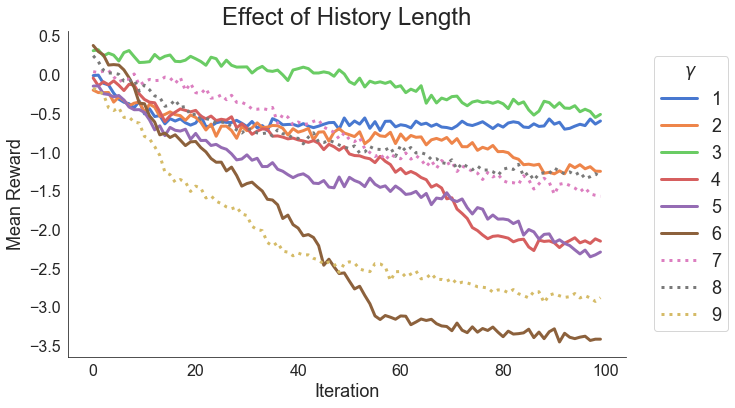

In [7]:
import seaborn as sns
sns.set_style("white")
sns.set_palette("muted")
# plt.rcParams['legend.title_fontsize'] = 'x-large'

ax_fs = 18
leg_fs = 18
tick_fs = 16
title_fs = 24
lwd = 3

plt.figure(figsize=(10, 6))
for ind, mj in enumerate(record_length[:6]):
    plt.plot(iterations, mean_rwrd[ind, :],
            label=str(mj.item()), linewidth=lwd)

    
for ind, mj in enumerate(record_length[6:]):
    plt.plot(iterations, mean_rwrd[ind+6, :],
            label=str(mj.item()), linestyle=":", linewidth=lwd)

sns.despine()
plt.xlabel("Iteration", fontsize=ax_fs)
plt.ylabel("Mean Reward", fontsize=ax_fs)
plt.tick_params("both", labelsize=tick_fs)
plt.title("Effect of History Length", fontsize=title_fs)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5),
          fontsize=leg_fs, title=r'$\gamma$',
          title_fontsize="xx-large")
plt.savefig("./record_length.pdf", bbox_inches="tight")
plt.show()